### preamble and datasets

<IPython.core.display.Javascript object>


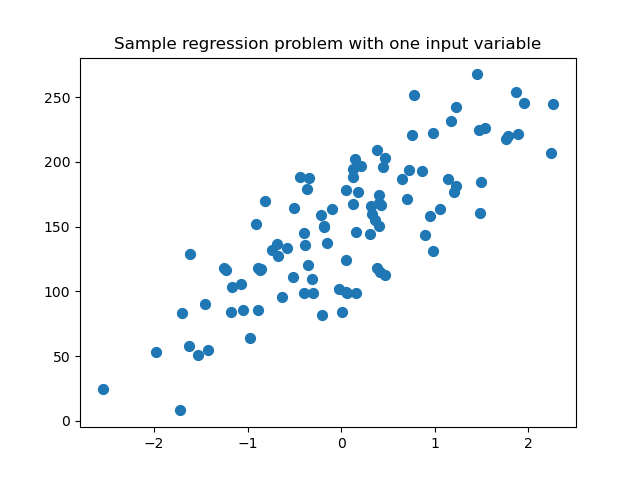

<IPython.core.display.Javascript object>


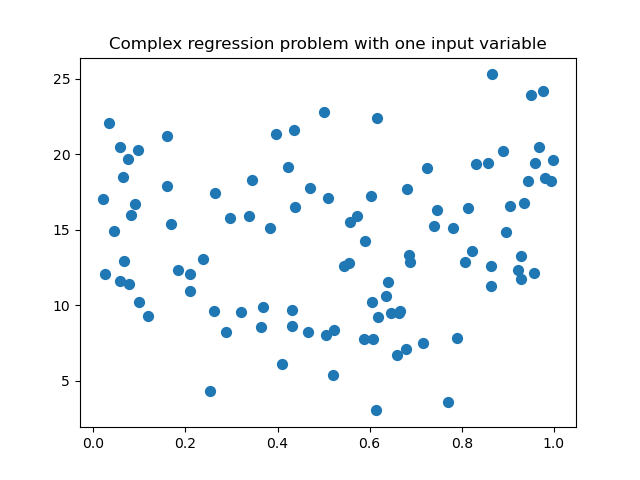

<IPython.core.display.Javascript object>


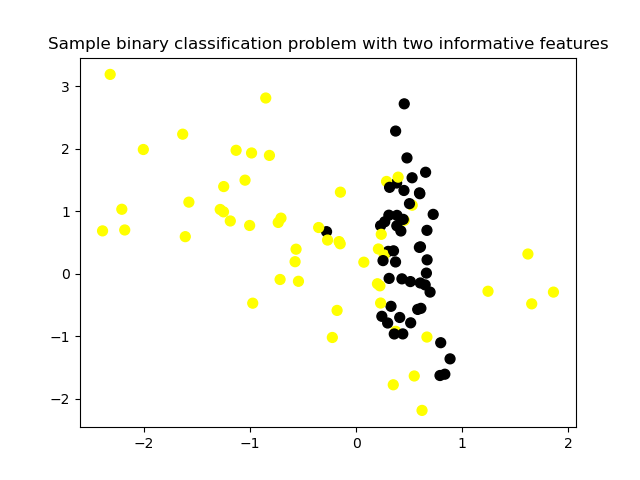

<IPython.core.display.Javascript object>


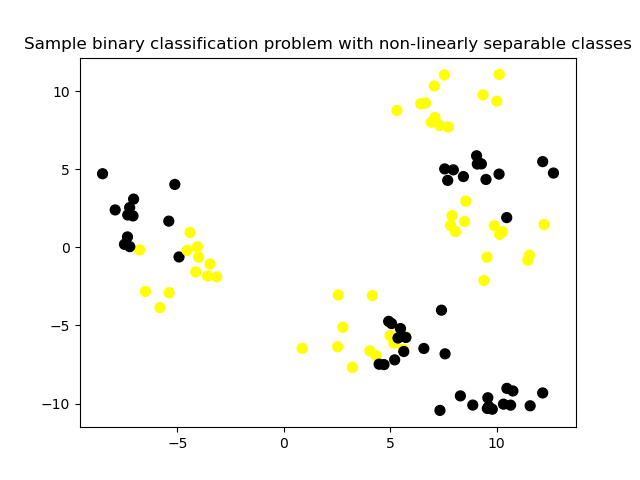

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('assets/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

#### naive bayes classifier 

Naïve Bayes is also known as a probabilistic classifier since it is based on Bayes’ Theorem. It would be difficult to explain
this algorithm without explaining the basics of Bayesian statistics. This theorem, also known as Bayes’ Rule, allows us to 
“invert” conditional probabilities. As a reminder, conditional probabilities represent the probability of an event given some 
other event has occurred, which is represented with the following formula: 


#### types of naive bayes
1. gaussian
2. multinominal
3. bernoulli
4. complement
5. caterogical

#### application of naive bayes classifier
1. real-time prediction
2. multi-class prediction
3. text classification/sentiment analysis/spam filtering
4. recomendation system

##### 1. Gaussian Naive Bayes: 

gaussiannb is used in classification tasks and it assumes that feature values follow a gaussian distribution.


##### 2. Multinomial Naive Bayes: 

It is used for discrete counts. For example, let’s say,  we have a text classification problem.
Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have   “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.


##### 3. Bernoulli Naive Bayes: 

The binomial model is useful if your feature vectors are boolean (i.e. zeros and ones). One application
would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does      not occur in the document” respectively.


##### 4. Complement Naive Bayes: 

It is an adaptation of Multinomial NB where the complement of each class is used to calculate the 
model weights. So, this is suitable for imbalanced data sets and often outperforms the MNB on text classification tasks.


##### 5. Categorical Naive Bayes: 

Categorical Naive Bayes is useful if the features are categorically distributed. We have to encode 
the categorical variable in the numeric format using the ordinal encoder for using this algorithm.

#### advatages and disadvantages of naive bayes algorithms

##### advantages

1. This algorithm works quickly and can save a lot of time. 

2. Naive Bayes is suitable for solving multi-class prediction problems. 

3. If its assumption of the independence of features holds true, it can perform better than other models and requires much less training data. 

4. Naive Bayes is better suited for categorical input variables than numerical variables.

##### Disadvantages


1. Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases.

2. This algorithm faces the ‘zero-frequency problem’ where it assigns zero probability to a categorical variable whose category in the test data set wasn’t available in the training dataset. It would be best if you used a smoothing technique to overcome this issue.

3. Its estimations can be wrong in some cases, so you shouldn’t take its probability outputs very seriously. 

### Naive bayes classifier

<IPython.core.display.Javascript object>


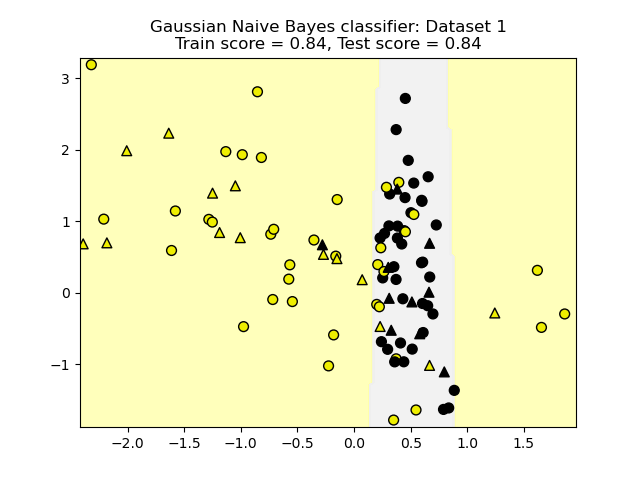

In [5]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
nbclf = GaussianNB().fit(X_train,y_train)
plot_class_regions_for_classifier (nbclf,X_train,y_train,X_test,y_test,'Gaussian Naive Bayes classifier: Dataset 1')

<IPython.core.display.Javascript object>


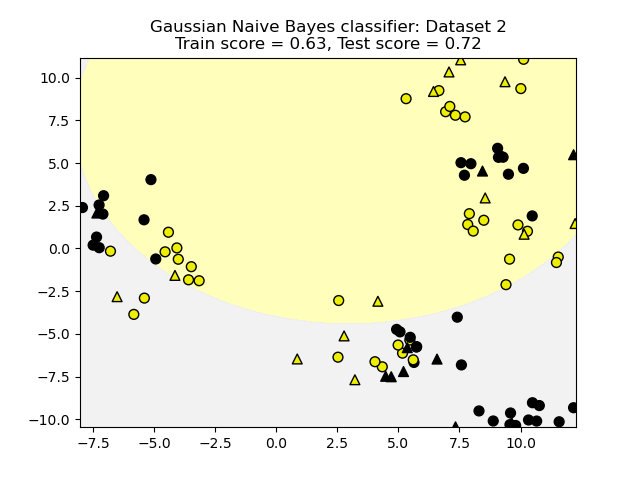

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

### application to a real-world datasets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94
